# Este es una ejemplo con numeros y redes Convucionales

In [1]:
#
import tensorflow as tf


In [2]:
import tensorflow_datasets as tfds

In [ ]:
#Explicación del codigo
#tsds cargas la libera para los dataset de tensorflow
#mnist es dataset de los digitos
#as_supervised entrega el dataset en formato de tupla (input, label)= (imagen, etiqueta)
#en caso de fuera face los datos se entregan como diccionario {'image': imagen, 'label': etiqueta}
#with_info=True es informacion del dataset 
datos, metadatos = tfds.load('mnist', as_supervised=True, with_info=True)


In [5]:
datos

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [6]:
metadatos

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='C:\\Users\\gerar\\tensorflow_datasets\\mnist\\3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={

In [ ]:
#divicion de datos 
datosEntrenamiento, datosPruebas = datos['train'], datos['test']

In [12]:
#Para que la red funcione mejor es necesario normalizar pasar los datos 0-255 a 0-1
def normalizar (imagenes, etiquetas):
    imagenes = tf.cast(imagenes, tf.float32)
    imagenes /= 255
    return imagenes, etiquetas

In [16]:
datosEntrenamiento = datosEntrenamiento.map(normalizar)
datosPruebas = datosPruebas.map(normalizar)

datosEntrenamiento = datosEntrenamiento.cache()
datosPruebas = datosPruebas.cache()

clases = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

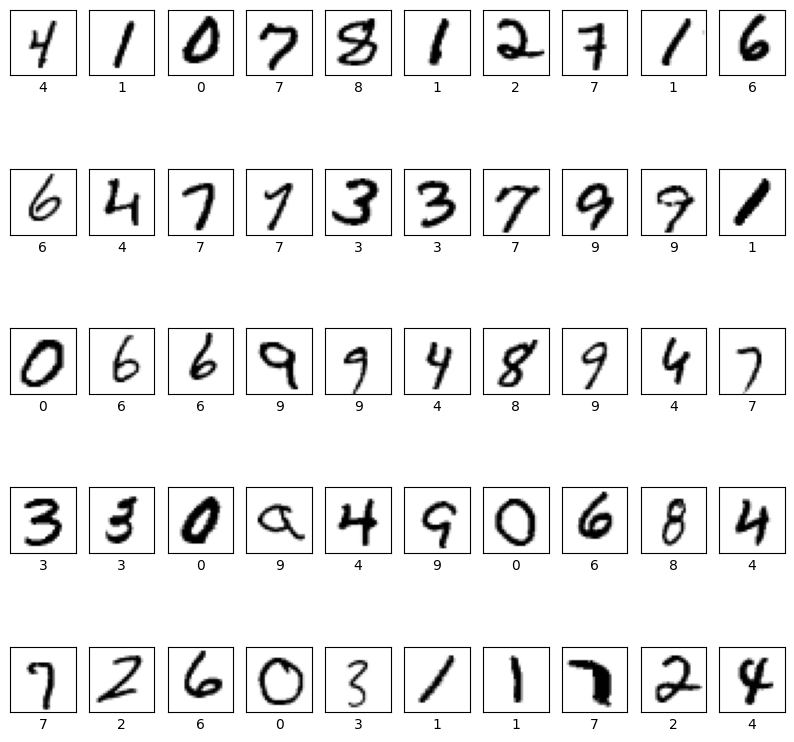

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i, (imagen, etiqueta) in enumerate(datosEntrenamiento.take(50)):
    imagen = imagen.numpy().reshape((28,28))
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagen, cmap=plt.cm.binary)
    plt.xlabel(clases[etiqueta])

plt.show()  

In [ ]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])